## Really complicated dna differentiation

Imagine a chain of nucleotides, divided in genes and intragenic DNA. Genes must be functioning, so they have a pattern, intragenic DNA not, so it can be random.

...intagrenic----gene----intragenic---gene---intragenic....

GENES

We have N genes Genes have the same order among neanderthal and humans:

Hair--Height--Eyes--Beard.. <- Neanderthal Hair--Height--Eyes--Beard.. <- Human

Humans and neanderthal are similar, so they have similar genes. Hence for a sigle gene i decided to have different variants, like brown hair, blond hairs, but they have to differ for small variation otherwise you would be bald.

From a logic point of view, change a small number of nucleotides from a random sequence so you have the variants, but they keep the same lenght in all the variants.

Genes have correlations between themselves, decided randomly between a random number of genes. For example Genes 1,8,15 are correlated in humans, correlations between 3 elements-> why? 3 is sampled from a "discrete gaussian", why 1,8,15 choseen random.

INTRAGENIC

We have N+1 intragenic sequence, of variable lenght interposed between genes.

How humans differ from neanderthal??

Intragenic dna different in lenght, for example in a human intragenic dna between genes 1 and 2, contains 100 nucleotides, while in the neanderthal 90. Correlations between different genes. like neanderthal correlates Nose and Beard, while human Height and Fat percentage.

How humans differ from humans and neanderthal from neanderthal?

Same intragenic lenght, but different nucleotides. Different genes variants.


In [1]:
#Manopole
#decide the percentage of geneDNA in a sentence.
pc_genes=0.8

#How many genes?
N_genes= 30

#Choose genes to correlate

#How many?
avg_dimension_of_correlation_clusters=10

b=0.5 #how different are different genes ? max 0.5
fraction_of_mutations_per_gene=0.3#percentage of random mutations in gene variants
variants=4 #how may variants?

det=0.1   #how much deterministic is the markov chain 0 MAX 0.25 Min  shuffle(prob(det det det 1-3*det))
forward_mc = False#do you want forward markov chain?


N_people= 3000
sentence_length= 1000 #HOW LONG A SENTENCE in letters
word_length=5 #HOW LONG A WORD in letters

#do you want same intragenic location in neanderthals and humans?
same = True

#Sorry i did not implemented different genes..

In [2]:

import numpy as np
import pandas as pd


#Build Genes

genes_nucleotides = (sentence_length*pc_genes) //1 
intragenic_nucleotides= sentence_length - genes_nucleotides

print(genes_nucleotides)
print(intragenic_nucleotides)

#How many intergenic sequences?
N_intragenic=N_genes+1



def split_in_different_leghts_sequence(how_many_nucleotides_for_genes, how_many_sequences):
    N_n=how_many_nucleotides_for_genes
    N_s=how_many_sequences
    seqs=np.zeros(N_s)
    for i in range(len(seqs)-1):
        while(True):
            ls=int(np.random.poisson((N_n/N_s)))
            if ls>1: 
                break
        N_n=N_n-ls
        N_s=N_s-1
        seqs[i]=int(ls)
    seqs[-1]=N_n
    return(seqs)


genes_char=split_in_different_leghts_sequence(genes_nucleotides, N_genes)
intragenic_char_humans=split_in_different_leghts_sequence(intragenic_nucleotides, N_intragenic)
if same == False : 
    intragenic_char_neanderthal=split_in_different_leghts_sequence(intragenic_nucleotides, N_intragenic)
else :
    intragenic_char_neanderthal=intragenic_char_humans


print(intragenic_char_neanderthal)
print(intragenic_char_humans)
print(genes_char)

#Now I have the characterization of all genic and intragenic sequences


800.0
200.0
[ 5.  4. 13. 10.  7.  8.  6.  4.  8.  4.  4.  7.  8. 13.  8.  5.  3.  8.
 11.  5.  3.  2.  7.  5.  4.  7.  7.  4.  7. 13.  0.]
[ 5.  4. 13. 10.  7.  8.  6.  4.  8.  4.  4.  7.  8. 13.  8.  5.  3.  8.
 11.  5.  3.  2.  7.  5.  4.  7.  7.  4.  7. 13.  0.]
[22. 36. 32. 26. 30. 25. 20. 30. 22. 32. 32. 28. 25. 34. 27. 27. 25. 30.
 20. 28. 13. 26. 26. 26. 32. 26. 28. 35. 13. 24.]


In [3]:


def correlate_genes(N_genes,cluster_dim):
    clusters=[]
    genes=[i for i in range((N_genes))]
    while(len(genes) != 0):
        while (True):
            if(cluster_dim>len(genes)): cluster_dim = len(genes)
            curr_cl= int(np.random.poisson((cluster_dim)))
            if curr_cl <= len(genes) and curr_cl>0: break
            else: print(curr_cl, len(genes))
        clusters.append(np.random.choice(genes, curr_cl, False))
        for c in clusters[-1]:
            genes.remove(c)
    return((clusters))

corrs_human=correlate_genes(N_genes,avg_dimension_of_correlation_clusters)
corrs_neanderthal=correlate_genes(N_genes,avg_dimension_of_correlation_clusters)

    
print("Theese are the correlation cluster, dont worry about the NAN it simply means that this cluster is smaller thna the number of columns")       
print("human")
display(pd.DataFrame(corrs_human)) 
print("neandertal")
display(pd.DataFrame(corrs_neanderthal))


if(forward_mc == True):
    for row in range(len(corrs_human)):
        corrs_human[row] = np.sort(corrs_human[row])
    for row in range(len(corrs_neanderthal)):
        corrs_neanderthal[row] = np.sort(corrs_neanderthal[row])
    print("SORTED:  ")
    print("human")
    display(pd.DataFrame(corrs_human)) 
    print("neandertal")
    display(pd.DataFrame(corrs_neanderthal))


        
        #Now i got the genes that are correlated.
#In future we can include different genes correlations between human and neanderthal

4 1
2 1
15 9
6 3
5 3
Theese are the correlation cluster, dont worry about the NAN it simply means that this cluster is smaller thna the number of columns
human


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,5,19.0,10.0,25.0,20.0,26.0,9.0,17.0,23.0,NaN,NaN,NaN,NaN
1,4,14.0,3.0,2.0,7.0,21.0,18.0,24.0,0.0,28.0,27.0,22.0,15.0
2,29,11.0,13.0,1.0,12.0,6.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN
3,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


neandertal


,0,1,2,3,4,5,6,7,8,9,10,11
0,3,11,22,21.0,23.0,18.0,27.0,4.0,20.0,NaN,NaN,NaN
1,6,29,25,28.0,15.0,17.0,2.0,0.0,13.0,16.0,7.0,19.0
2,9,26,12,14.0,8.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
3,5,1,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Now let's build the genes and their variants.

var=variants-1 # ;) read the code and you'll know why
genes=[]

#Here we build the single gene

for i in range(N_genes):    
    tmp_var=np.random.random(4)*2*b +(0.5-b)
    distr_f_a_gene=tmp_var/sum(tmp_var)
    #print(np.cumsum(distr_f_a_gene))
    genes_tmp=[]
    for j in range(int(genes_char[i])): 
        MC_1=np.random.random(1)
        which_nucleotide=0
        for lim in np.cumsum(distr_f_a_gene):
            if(MC_1<=lim): 
                genes_tmp.append(which_nucleotide)
                MC_1= 0
                break
            else:   which_nucleotide+=1 
    genes.append(genes_tmp)
#now add random mutations to characterize each variant.
#we'll have genes->n variants
genes_nv=genes
genes=[]
#print(genes[0][0])

i=0
for gene in genes_nv:
    tmp_var=[]
    tmp_var.append(gene)
    for j in range(var) :
        mutations_where=[]
        mutations_where=np.random.choice(range(len(gene)), 
                                    (int(fraction_of_mutations_per_gene*len(gene))) , False)
        #print(range(len(gene)))
        
        tmp_a=list(gene)
        for m_w in mutations_where:
            tmp_a[m_w]=np.random.randint(4)
            
        tmp_var.append(tmp_a)
    genes.append(tmp_var)
        
print("you got these number of variants per gene : ",len(genes[0]))


you got these number of variants per gene :  4


In [5]:
#old version

"""

#Make a prob_distr for each correlation cluster, to choose the variants
corr_distr_human=[]
corr_distr_nean=[]
for i in range(len(corrs_human)):
    #print(np.random.rand(prob_xcorr.shape[0]).argsort())
    prob_xcorr= np.random.random((variants,variants))*0.5
    prob_xcorr[1:,1]=np.ones(3)*2
    np.random.shuffle(prob_xcorr)
    prob_xcorr=prob_xcorr.T
    np.random.shuffle(prob_xcorr)
    #np.random.shuffle(prob_xcorr, axis=1) #np.random.random(var+1)
    prob_xcorr=np.cumsum(prob_xcorr, axis=0)/np.sum(prob_xcorr,axis=0)
    corr_distr_human.append(prob_xcorr)
for i in range(len(corrs_neanderthal)):
    prob_xcorr= np.random.random((variants,variants))*0.5
    prob_xcorr[1:,1]=np.ones(3)*2
    np.random.shuffle(prob_xcorr)
    prob_xcorr=prob_xcorr.T
    np.random.shuffle(prob_xcorr)
    #print(prob_xcorr)
    prob_xcorr=np.cumsum(prob_xcorr, axis=0)/np.sum(prob_xcorr, axis=0)
    print(prob_xcorr)
    corr_distr_nean.append(prob_xcorr)

print("Limits for the Monte Carlo,matrices as many as the clusters, columns as many as the variants, rows as many as the variants")    
print("human")
display(corr_distr_human)
print("nean")
display(corr_distr_nean) """

'\n\n#Make a prob_distr for each correlation cluster, to choose the variants\ncorr_distr_human=[]\ncorr_distr_nean=[]\nfor i in range(len(corrs_human)):\n    #print(np.random.rand(prob_xcorr.shape[0]).argsort())\n    prob_xcorr= np.random.random((variants,variants))*0.5\n    prob_xcorr[1:,1]=np.ones(3)*2\n    np.random.shuffle(prob_xcorr)\n    prob_xcorr=prob_xcorr.T\n    np.random.shuffle(prob_xcorr)\n    #np.random.shuffle(prob_xcorr, axis=1) #np.random.random(var+1)\n    prob_xcorr=np.cumsum(prob_xcorr, axis=0)/np.sum(prob_xcorr,axis=0)\n    corr_distr_human.append(prob_xcorr)\nfor i in range(len(corrs_neanderthal)):\n    prob_xcorr= np.random.random((variants,variants))*0.5\n    prob_xcorr[1:,1]=np.ones(3)*2\n    np.random.shuffle(prob_xcorr)\n    prob_xcorr=prob_xcorr.T\n    np.random.shuffle(prob_xcorr)\n    #print(prob_xcorr)\n    prob_xcorr=np.cumsum(prob_xcorr, axis=0)/np.sum(prob_xcorr, axis=0)\n    print(prob_xcorr)\n    corr_distr_nean.append(prob_xcorr)\n\nprint("Limits fo

In [6]:
#yo use this to build markov chainz
chain=np.array([i for i in range(variants)])
corr_distr_human=[]
corr_distr_nean=[]

for i in range(len(corrs_human)):
    np.random.shuffle(chain)
    prob_xcorr= np.ones((variants,variants))*det
    for j in range(-1,variants-1):
        prob_xcorr[j+1,j]=1-(3*det)
    prob_xcorr=np.cumsum(prob_xcorr, axis=0)/np.sum(prob_xcorr,axis=0)
    corr_distr_human.append(prob_xcorr)

for i in range(len(corrs_neanderthal)):
    np.random.shuffle(chain)
    prob_xcorr= np.ones((variants,variants))*det
    for j in range(-1,variants-1):
        prob_xcorr[j+1,j]=1-(3*det)
    prob_xcorr=np.cumsum(prob_xcorr, axis=0)/np.sum(prob_xcorr,axis=0)
    corr_distr_nean.append(prob_xcorr)



print("Limits for the Monte Carlo,matrices as many as the clusters, columns as many as the variants, rows as many as the variants")    
print("human")
display(corr_distr_human)
print("nean")
display(corr_distr_nean)

Limits for the Monte Carlo,matrices as many as the clusters, columns as many as the variants, rows as many as the variants
human


[array([[0.1, 0.1, 0.1, 0.7],
        [0.8, 0.2, 0.2, 0.8],
        [0.9, 0.9, 0.3, 0.9],
        [1. , 1. , 1. , 1. ]]),
 array([[0.1, 0.1, 0.1, 0.7],
        [0.8, 0.2, 0.2, 0.8],
        [0.9, 0.9, 0.3, 0.9],
        [1. , 1. , 1. , 1. ]]),
 array([[0.1, 0.1, 0.1, 0.7],
        [0.8, 0.2, 0.2, 0.8],
        [0.9, 0.9, 0.3, 0.9],
        [1. , 1. , 1. , 1. ]]),
 array([[0.1, 0.1, 0.1, 0.7],
        [0.8, 0.2, 0.2, 0.8],
        [0.9, 0.9, 0.3, 0.9],
        [1. , 1. , 1. , 1. ]])]

nean


[array([[0.1, 0.1, 0.1, 0.7],
        [0.8, 0.2, 0.2, 0.8],
        [0.9, 0.9, 0.3, 0.9],
        [1. , 1. , 1. , 1. ]]),
 array([[0.1, 0.1, 0.1, 0.7],
        [0.8, 0.2, 0.2, 0.8],
        [0.9, 0.9, 0.3, 0.9],
        [1. , 1. , 1. , 1. ]]),
 array([[0.1, 0.1, 0.1, 0.7],
        [0.8, 0.2, 0.2, 0.8],
        [0.9, 0.9, 0.3, 0.9],
        [1. , 1. , 1. , 1. ]]),
 array([[0.1, 0.1, 0.1, 0.7],
        [0.8, 0.2, 0.2, 0.8],
        [0.9, 0.9, 0.3, 0.9],
        [1. , 1. , 1. , 1. ]])]

In [7]:
"""import math as m
np.random.shuffle(chain)
hg_0=(list(chain)*m.ceil(N_genes/len(chain)))[:N_genes]
np.random.shuffle(chain)
ng_0=(list(chain)*m.ceil(N_genes/len(chain)))[:N_genes]

hg_ic = np.ones((N_people,N_genes))
ng_ic = np.ones((N_people,N_genes))

for i in range(hg_ic.shape[0]):
    hg_ic[i,:]=hg_0
    ng_ic[i,:]=ng_0
print(hg_ic[0])
print(ng_ic[0])"""

'import math as m\nnp.random.shuffle(chain)\nhg_0=(list(chain)*m.ceil(N_genes/len(chain)))[:N_genes]\nnp.random.shuffle(chain)\nng_0=(list(chain)*m.ceil(N_genes/len(chain)))[:N_genes]\n\nhg_ic = np.ones((N_people,N_genes))\nng_ic = np.ones((N_people,N_genes))\n\nfor i in range(hg_ic.shape[0]):\n    hg_ic[i,:]=hg_0\n    ng_ic[i,:]=ng_0\nprint(hg_ic[0])\nprint(ng_ic[0])'

In [8]:


from IPython.display import clear_output
import copy
neanderthals=[]
humans=[]

hg_ic=[]
ng_ic=[]

genome_corr_h=[]
genome_corr_n=[]


for person in range(N_people):
    _tmg=np.random.randint(variants)     #a variant random                  
    clear_output(wait="True")
    print("Loading : ",person, "/", N_people )
    
    #Build genome info
    
    #HUMANS
    
    human_genome_info=np.zeros(N_genes)       
    for i in range(len(corr_distr_human)):    #which cluster
        for gene in corrs_human[i]:               #for every gene in the cluster
            which_variants=0           
            MC_2=np.random.random()
            for lim in corr_distr_human[i][:,_tmg]:
                if(MC_2<=lim):                          #use a monte carlo on markov to choose the variant
                    human_genome_info[gene]=which_variants
                    MC_2= 0
                    _tmg=which_variants                 #jump to the other variant distr for the next it.
                    break
                else: which_variants+=1
    _tmg=np.random.randint(variants)
    genome_corr_h.append(copy.deepcopy(human_genome_info))  #now i have the genome, i copy that.
    
    #NEAND
    
    nean_genome_info=np.zeros(N_genes)
    for i in range(len(corr_distr_nean)):                   #same for neanderthal
        for gene in corrs_neanderthal[i]:
            which_variants=0           
            MC_2=np.random.random()
            for lim in corr_distr_nean[i][:,_tmg]:
                if(MC_2<=lim): 
                    nean_genome_info[gene]=which_variants
                    MC_2= 0
                    _tmg=which_variants
                    break
                else: which_variants+=1
    
    
    genome_corr_n.append(copy.deepcopy(nean_genome_info))
   
    #From the info insert the variant.

    human_genome=[]
    nean_genome=[]

    for i in range(len(human_genome_info)):
    
        human_genome.append(genes[i][int(human_genome_info[i])]) #put the complete gene in an array .
    for i in range(len(nean_genome_info)):                       #as decided with the monte carlo.
        nean_genome.append(genes[i][int(nean_genome_info[i])])
   

    hg_ic.append(human_genome_info)
    ng_ic.append(nean_genome_info)
    
    human_genome_info=[]
    nean_genome_info=[]
    
    
    

    #build intragenic
    
    human_intra=[]                                                #build intragenic
    nean_intra=[]
    for i in range(len(intragenic_char_humans)):                  
        human_intra.append(np.random.randint(4,size=int(intragenic_char_humans[i])))

    for i in range(len(intragenic_char_neanderthal)):
        nean_intra.append(np.random.randint(4,size=int(intragenic_char_neanderthal[i])))

    #build the complete DNA

    human_DNA= list(human_intra[0])
    nean_DNA= list(nean_intra[0])
    

    for i in range(0,N_genes):
        for nuc in human_genome[i]:
            human_DNA.append(nuc)
        for nuc in human_intra[i+1]:
            human_DNA.append(nuc)
        for nuc in nean_genome[i]:
            nean_DNA.append(nuc)
        for nuc in nean_intra[i+1]:
            nean_DNA.append(nuc)
            
    #from numbers to letters acgt

    human_genome=[]
    nean_genome=[]
    nean_intra=[]
    human_intra=[]

    my_d={0:'A',1:'C',2:'G',3:'T'}
    for i in range(len(human_DNA)):
        human_DNA[i]=my_d[human_DNA[i]]
    for i in range(len(nean_DNA)):
        nean_DNA[i]=my_d[nean_DNA[i]]
    
    humans.append(human_DNA)
    neanderthals.append(nean_DNA)
    human_DNA =[]
    nean_DNA=[]
    
humans=np.array(humans)
neanderthals=np.array(neanderthals)

print(humans.shape)
print(neanderthals.shape)

#divide in words




h_DNA= np.array(np.split(humans, sentence_length//word_length, axis=1  ))
n_DNA= np.array(np.split(neanderthals, sentence_length//word_length , axis=1 ))
print("sentences, words, letter*words")
print(N_people, sentence_length, word_length)

      
print(h_DNA.shape)
print(n_DNA.shape)

Loading :  2999 / 3000
(3000, 1000)
(3000, 1000)
sentences, words, letter*words
3000 1000 5
(200, 3000, 5)
(200, 3000, 5)


# TEST YOUR DATA BEFORE TRAINING the NN

see if its all as you wanted
see if a nn feeded with just the info (no noise) work, if not you have to change params

## check if the genome is correct:

if you used det = 0 the sequence in the markov chain is deterministic in a given cluster. -> first print you see for cluster 1 ( corrs_human[1]) 

if yoy used forward MC True, the second print is equal to the first (if det = 0 ) because the chain is only moving forward.


In [9]:
#check if the genome is correct:
hg_ic=np.array(hg_ic)
ng_ic=np.array(ng_ic)
print()
#is the chain going forward and backwards?  depends on id forward_mc true or false

print()
print(corrs_human[3])
display(hg_ic[:10, np.sort(corrs_human[3])])




[8]


array([[3.],
       [0.],
       [2.],
       [3.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [0.]])

## TEST

We can train the net on pure information (no noise, genese condensed in their variant, so on just genome infos)
If it does not work here it cannot work on the informatio+noise dataset

Using TensorFlow backend.


(6000, 1, 30)
(4800, 1, 30)


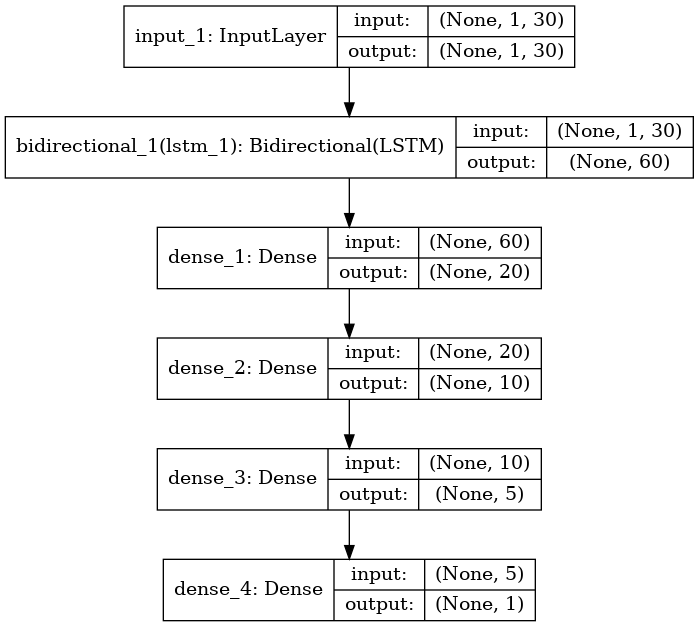

In [10]:
#reshape data to feed the net.
hg_ic=list(hg_ic)
ng_ic=list(ng_ic)
xt=np.array(hg_ic+ng_ic)
perm=[i for i in range(xt.shape[0])]
np.random.shuffle(perm)
xt=xt.reshape(xt.shape[0],xt.shape[1],1)
yt = [1]*len(hg_ic)+[0]*len(ng_ic)


xt=np.array(xt)[perm]
xt=xt.reshape(xt.shape[0],xt.shape[2],xt.shape[1])
yt=np.array(yt)[perm]
#yt=yt.reshape(yt.shape[0], 1,1)


from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(xt, yt, test_size = 0.20, random_state = 42, shuffle = True)

#print(np.array(Xt_train)[:10,:3], np.array(Yt_train)[:10])

import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout, concatenate
from keras.layers import Embedding, GlobalAveragePooling1D, LSTM, SimpleRNN, GRU, Bidirectional
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras import regularizers
n_clusters=1
print(xt.shape)
print(Xt_train.shape)
inputs= keras.Input(shape=(1,xt.shape[2]))
lstm=[]
for i in range(n_clusters):
    #lstm.append(LSTM(xt.shape[1], dropout = 0.0,input_shape=(xt.shape[1],1), recurrent_dropout = 0.0)(inputs))
#kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)   
    lstm.append(Bidirectional(LSTM(N_genes//n_clusters, dropout = 0.0,input_shape=(xt.shape[1],1), recurrent_dropout = 0.0))(inputs))
#kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)   
#merge=concatenate([l for l in lstm])
#d=Dense(5,kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01))(inputs)
d1=Dense(20)(lstm[0])
d2=Dense(10)(d1)
d3=Dense(5)(d2)
f1=Dense(1, activation = 'sigmoid')(d3)

model = keras.Model(inputs = inputs , outputs = f1, name = "test")
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
keras.utils.plot_model(model, show_shapes = True)


40 genes avg dim cluster 10 (det = 0.1), not forward->
    Bidirectional see back and forward markov chain 76 % acc 
    also the non bidirectional..70%


avg dim cluster ->3 ops wrong
    
    10bdlstm = 83% take some time..
    5bd = 85% 
    2bdlstm = 84 %
    1bdlstm = 86
     

avg dim cluster ->20 

     5bd = 84% less (epochs)
     2bd = 85%
     10  = 83%


try with 100 genes

avg dim cluster ->3 
    
     1bdlstm = 91%
     5bdlstm = 90%
    
    



In [11]:
epochs = 20

history = model.fit(Xt_train, Yt_train, epochs = epochs, verbose = 1, validation_split = 0.2, batch_size = 50, shuffle = True)

Train on 3840 samples, validate on 960 samples
Epoch 1/20
3840/3840 [==============================] - 3s 653us/step - loss: 0.6896 - accuracy: 0.5393 - val_loss: 0.6661 - val_accuracy: 0.6260
Epoch 2/20
3840/3840 [==============================] - 1s 200us/step - loss: 0.6348 - accuracy: 0.6615 - val_loss: 0.6057 - val_accuracy: 0.7000
Epoch 3/20
3840/3840 [==============================] - 1s 200us/step - loss: 0.5432 - accuracy: 0.7424 - val_loss: 0.5194 - val_accuracy: 0.7521
Epoch 4/20
3840/3840 [==============================] - 1s 239us/step - loss: 0.4616 - accuracy: 0.7786 - val_loss: 0.5065 - val_accuracy: 0.7437
Epoch 5/20
3840/3840 [==============================] - 1s 233us/step - loss: 0.4227 - accuracy: 0.8042 - val_loss: 0.4452 - val_accuracy: 0.7833
Epoch 6/20
3840/3840 [==============================] - 1s 200us/step - loss: 0.3886 - accuracy: 0.8229 - val_loss: 0.4271 - val_accuracy: 0.7990
Epoch 7/20
3840/3840 [==============================] - 1s 224us/step - loss:

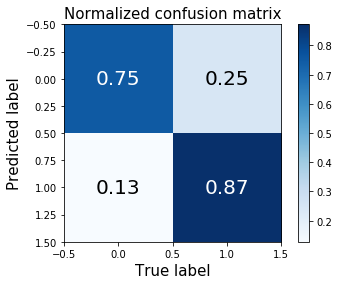

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

predicted_labels = model.predict(Xt_test)
cm = confusion_matrix(Yt_test, [np.round(i[0]) for i in predicted_labels])
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]



plt.imshow(cm, cmap = plt.cm.Blues)
plt.title('Normalized confusion matrix', fontsize = 15)
plt.colorbar()
plt.xlabel('True label', fontsize = 15)
plt.ylabel('Predicted label', fontsize = 15)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment = 'center', verticalalignment = 'center', fontsize = 20,
             color='white' if cm[i, j] > 0.5 else 'black')
plt.show()


yt=[]
xt=[]
hg_ic=[]
ng_ic=[]

## Long Range Correlations

In [66]:
#order ACGT
new_dict={'A':0, "C":1 , "G":2, "T":3}

r=[2,5,10,20,30,50,80,90,100]

couples_h=np.zeros((4,4,len(r)))
freqs_h=np.zeros(4)
couples_n=np.zeros((4,4, len(r)))
freqs_n=np.zeros(4)

for sentence in humans:
    for nuc in sentence:
        freqs_h[new_dict[nuc]]+=1
freqs_h=freqs_h/(humans.shape[0]*humans.shape[1])
print("Freqs H")
print(freqs_h)
fh_h=list(freqs_h)

print()
freqs_h=[[a*b for b in freqs_h]for a in freqs_h]
freqs_h=np.array(freqs_h)


for sentence in neanderthals:
    for nuc in sentence:
        freqs_n[new_dict[nuc]]+=1
freqs_n=freqs_n/(neanderthals.shape[0]*neanderthals.shape[1])

print("Freqs_ N ")
print(freqs_n)
fn_n=list(freqs_n)

freqs_n=[[a*b for b in freqs_n]for a in freqs_n]
freqs_n=np.array(freqs_n)

print("Done P(x_i)")

for k in range(len(r)):
    for sentence in humans:
         for idx in range(len(sentence)-r[k]):
                couples_h[new_dict[sentence[idx]],new_dict[sentence[idx+r[k]]], k ]+=1            
    couples_h[:,:,k]=couples_h[:,:,k]/(humans.shape[0]*(humans.shape[1]-r[k]))

                
for k in range(len(r)):
    for sentence in neanderthals:
         for idx in range(len(sentence)-r[k]):
                couples_n[new_dict[sentence[idx]],new_dict[sentence[idx+r[k]]], k ]+=1
    couples_n[:,:,k]=couples_n[:,:,k]/(neanderthals.shape[0]*(neanderthals.shape[1]-r[k]))
                          
print("Done P(x_i|x_j)")
for i in range(len(r)):
    print("Check")
    print(couples_n[:,:,i])

#compute correlations
    #sum i sum j couples[i,j]-

Cr_h=np.zeros(len(r))
Cr_n=np.zeros(len(r))
for k in range(len(r)):
 
    print(np.sum(couples_h[:,:,k]-freqs_h))
    Cr_h[k]=np.sum(couples_h[:,:,k]-freqs_h)
    Cr_n[k]=np.sum(couples_n[:,:,k]-freqs_n)

print(freqs_h.shape) 

Freqs H
[0.27941167 0.23916333 0.236472   0.244953  ]

Freqs_ N 
[0.279373   0.23904633 0.23697133 0.24460933]
Done P(x_i)
Done P(x_i|x_j)
Check
[[0.09043454 0.05907348 0.06492719 0.06372979]
 [0.06552037 0.06526653 0.05188577 0.05685271]
 [0.05888778 0.05650367 0.0622682  0.05978657]
 [0.06457214 0.05817702 0.05789212 0.06422211]]
Check
[[0.08991558 0.06177889 0.06063585 0.06590519]
 [0.06499765 0.06313132 0.0544258  0.05668777]
 [0.06320804 0.05296985 0.06128744 0.05945494]
 [0.06136616 0.06110854 0.06057286 0.0625541 ]]
Check
[[0.08558956 0.05702189 0.06676027 0.06672795]
 [0.06932088 0.05675522 0.06274714 0.05162761]
 [0.05727811 0.06165791 0.05444478 0.06420976]
 [0.06795253 0.0627404  0.05239832 0.06276768]]
Check
[[0.07526361 0.0633051  0.06572687 0.0685068 ]
 [0.06684592 0.05681735 0.05904286 0.05839796]
 [0.06275034 0.05915102 0.05227483 0.06432959]
 [0.07276939 0.05980238 0.05942755 0.05558844]]
Check
[[0.07478969 0.06747698 0.0640055  0.06547663]
 [0.06927595 0.05204983 0.05

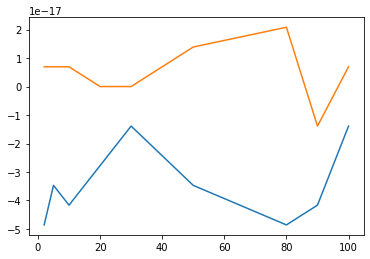

In [82]:
# Dont see any correlation..

#plt.xscale=("log")
#plt.yscale=("log")
plt.plot(r, Cr_h)
plt.plot(r,Cr_n)
plt.show()

## Frequency of nucleotides

[[0.07807088 0.06682503 0.06607304 0.06844273]
 [0.06682503 0.0571991  0.05655543 0.05858378]
 [0.06607304 0.05655543 0.05591901 0.05792453]
 [0.06844273 0.05858378 0.05792453 0.06000197]]


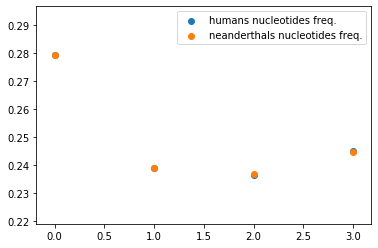

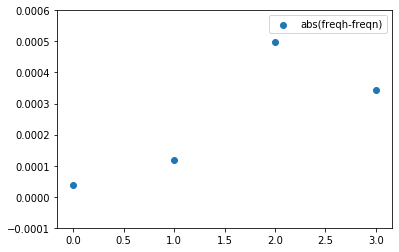

In [79]:
print(freqs_h)
plt.scatter(range(4),fh_h, label = "humans nucleotides freq.")
plt.scatter(range(4),fn_n, label= "neanderthals nucleotides freq.")
plt.legend()
plt.show()

plt.scatter(range(4),abs(np.array(fn_n)-np.array(fh_h)), label= "abs(freqh-freqn)")
plt.ylim(-0.0001,+0.0006)
plt.legend()
plt.show()

## Check the words frequency for DNA

(3000, 200)


array(['TACCG', 'ACGGC', 'GACAA', ..., 'AAAAG', 'TTAAA', 'ACGAA'],
      dtype='<U5')

here
there
20


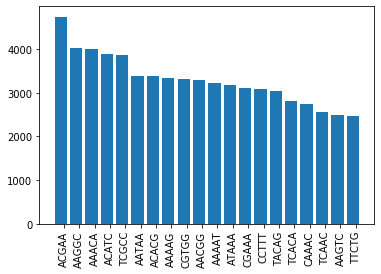

here
there
20


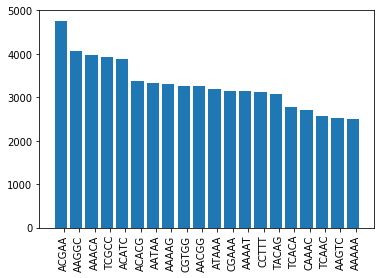

In [15]:
DNA_length= sentence_length*N_people
#make words strings.
h_DNA = np.array([[''.join(h_DNA[i,j,:]) for i in range(h_DNA.shape[0]) ]for 
                  j in range(h_DNA.shape[1])])
#make words strings.
n_DNA = np.array([[''.join(n_DNA[i,j,:]) for i in range(n_DNA.shape[0]) ]for 
                  j in range(n_DNA.shape[1])])

print(h_DNA.shape)

h_DNA_check= h_DNA.reshape(DNA_length//word_length)
n_DNA_check= n_DNA.reshape(DNA_length//word_length)
display(h_DNA_check)
h_DNA_check1=[]
n_DNA_check1=[]



from collections import Counter
import matplotlib.pyplot as  plt


##HUMAN
print("here")
counts_h=dict(Counter(h_DNA_check).most_common(20))
print("there")
labels_h, values_h = zip(*counts_h.items())

#sort
indsort_h = np.argsort(values_h)[::-1]

#re_arrange
labels_h= np.array(labels_h)[indsort_h]
values_h= np.array(values_h)[indsort_h]
indexes_h = np.arange(len(values_h))
bar_width=0.2
plt.bar(indexes_h, values_h)
plt.xticks(indexes_h+bar_width,labels_h, rotation= 90)
print(len(counts_h))

plt.show()

##NEANDERTHAL
print("here")
counts_n=dict(Counter(n_DNA_check).most_common(20))
print("there")
labels_n, values_n = zip(*counts_n.items())

#sort
indsort_n = np.argsort(values_n)[::-1]

#re_arrange
labels_n= np.array(labels_n)[indsort_n]
values_n= np.array(values_n)[indsort_n]
indexes_n = np.arange(len(values_n))
bar_width=0.2
plt.bar(indexes_n, values_n)
plt.xticks(indexes_n+bar_width,labels_n, rotation= 90)
print(len(counts_n))

plt.show()



## Prepare Data for NN

In [16]:
h_DNA_NN=[' '.join(h_DNA[i,:]) for i in range(h_DNA.shape[0])]
n_DNA_NN=[' '.join(n_DNA[i,:]) for i in range(n_DNA.shape[0])]

DNA_NN = h_DNA_NN+n_DNA_NN
Y = [1]*len(h_DNA_NN)+[0]*len(n_DNA_NN)


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(DNA_NN)

encoded_docs = tokenizer.texts_to_sequences(DNA_NN)

max_length = max([len(s.split()) for s in DNA_NN])
X = pad_sequences(encoded_docs, maxlen = max_length, padding = 'post')


from sklearn.model_selection import train_test_split
#X=X.reshape(X.shape[0],X.shape[1],1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, shuffle = True)

print(X_train.shape)
print(len(Y_train))
vocab_size = len(tokenizer.word_index) + 1
print(max_length)

(4800, 200)
4800
200


In [17]:
"""from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
#test 2
Y = [1]*len(h_DNA)+[0]*len(n_DNA)
print(len(h_DNA))
print(len(Y))
X = list(h_DNA)+list(n_DNA)
print(len(X))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20,  shuffle = True)


X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train = np.array(Y_train)

#X_train=X_train.reshape((X_train.shape[0],X_train.shape[1],1))
#X_test=X_test.reshape((X_test.shape[0],X_test.shape[1],1))

print(X_train.shape)
print(Y_train.shape)"""

'from keras.preprocessing.text import Tokenizer\nfrom keras.preprocessing.sequence import pad_sequences\nfrom sklearn.feature_extraction.text import CountVectorizer\nfrom sklearn.feature_extraction.text import TfidfTransformer\nfrom sklearn.model_selection import train_test_split\n#test 2\nY = [1]*len(h_DNA)+[0]*len(n_DNA)\nprint(len(h_DNA))\nprint(len(Y))\nX = list(h_DNA)+list(n_DNA)\nprint(len(X))\nX_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20,  shuffle = True)\n\n\nX_train=np.array(X_train)\nX_test=np.array(X_test)\nY_train = np.array(Y_train)\n\n#X_train=X_train.reshape((X_train.shape[0],X_train.shape[1],1))\n#X_test=X_test.reshape((X_test.shape[0],X_test.shape[1],1))\n\nprint(X_train.shape)\nprint(Y_train.shape)'

## Let's build an LSTM NN

In [18]:
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout
from keras.layers import Embedding, GlobalAveragePooling1D, LSTM, SimpleRNN, GRU, Bidirectional
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras import regularizers

model = Sequential()
model.add(Embedding(vocab_size, 32, input_length = max_length, dropout = 0.2))
#model.add(SimpleRNN(10, dropout = 0.2, recurrent_dropout = 0.2))  #this sucks
model.add(LSTM(10, dropout = 0.2, recurrent_dropout = 0.2))  #totally killing it
#model.add(Conv1D(10, dropout = 0.2, recurrent_dropout = 0.2)) 

model.add(Dense(5,
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dense(1, activation = 'sigmoid'))


model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
checkpoint = ModelCheckpoint("weights.best.hdf5", monitor = 'val_acc', verbose = 1, 
                             save_best_only = True, mode = 'max')
print(model.summary())

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  # Remove the CWD from sys.path while we load stuff.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 32)           32800     
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                1720      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 34,581
Trainable params: 34,581
Non-trainable params: 0
_________________________________________________________________
None


(4800, 200)


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  from ipykernel import kernelapp as app


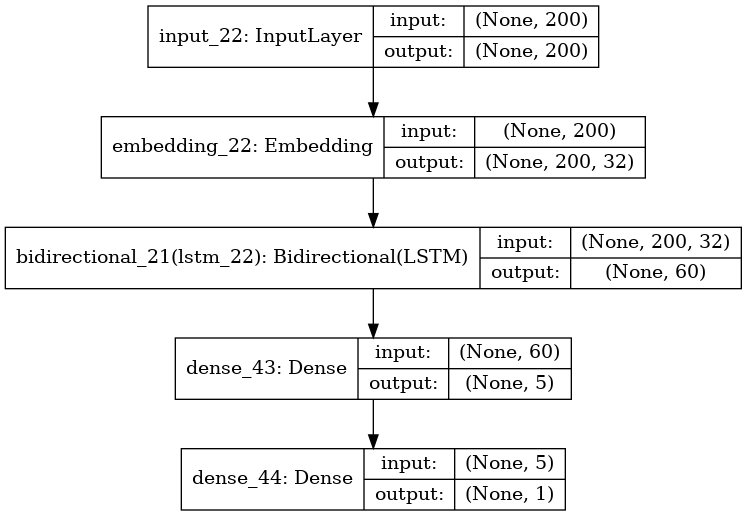

In [54]:
print(X_train.shape)


import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout, concatenate
from keras.layers import Embedding, GlobalAveragePooling1D, LSTM, SimpleRNN, GRU, Bidirectional
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras import regularizers
n_clusters=1
#inputs= keras.Input(shape=(max_length,1))
inputs= keras.Input(shape=(max_length,))
emb=Embedding(vocab_size, 32, input_length = max_length, dropout = 0.2)(inputs)
lstm=[]
conv1 = Conv1D(filters=1,
               kernel_size=3,
               strides=1,
               activation='relu')(emb)
pool1 = MaxPooling1D(pool_size=3)(conv1)
for i in range(n_clusters):
    lstm.append(Bidirectional(LSTM(N_genes, dropout=0.1))(emb))
    
#merge=concatenate([l for l in lstm])
#d=Dense(10 ,kernel_regularizer=regularizers.l1(0.01))(lstm[0])
d1=Dense(5,kernel_regularizer=regularizers.l2(0.01))(lstm[0])
f=Dense(1, activation = 'sigmoid')(d1)

model = keras.Model(inputs = inputs , outputs = f, name = "test")
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
keras.utils.plot_model(model, show_shapes = True)


#Manopole
#decide the percentage of geneDNA in a sentence.
pc_genes=0.7
#How many genes?
N_genes= 30
#Choose genes to correlate
#How many?
avg_dimension_of_correlation_clusters=10
b=0.5 #how different are different genes ? max 0.5
fraction_of_mutations_per_gene=1#percentage of random mutations in gene variants
variants=4 #how may variants?
det=0.0  #how much deterministic is the markov chain 0 MAX 0.25 Min  shuffle(prob(det det det 1-3*det))
forward_mc = False#do you want forward markov chain?
N_people= 3000
sentence_length= 999 #HOW LONG A SENTENCE in letters
word_length=3 #HOW LONG A WORD in letters

same = True
with embedding -> WORKSS!! Thus no random..


worked with det = 0.05

30 it 80% acc

det = 0.01
30 it   67%

In [55]:
epochs = 30
history = model.fit(X_train, Y_train, epochs = epochs, verbose = 1, validation_split = 0.2, batch_size = 50, shuffle = True)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3840 samples, validate on 960 samples
Epoch 1/30
3840/3840 [==============================] - 38s 10ms/step - loss: 0.7551 - accuracy: 0.4958 - val_loss: 0.7312 - val_accuracy: 0.4792
Epoch 2/30
3840/3840 [==============================] - 36s 9ms/step - loss: 0.7153 - accuracy: 0.5206 - val_loss: 0.7050 - val_accuracy: 0.5552
Epoch 3/30
3840/3840 [==============================] - 38s 10ms/step - loss: 0.6946 - accuracy: 0.5672 - val_loss: 0.7637 - val_accuracy: 0.4865
Epoch 4/30
3840/3840 [==============================] - 36s 9ms/step - loss: 0.6960 - accuracy: 0.5383 - val_loss: 0.7003 - val_accuracy: 0.5188
Epoch 5/30
3840/3840 [==============================] - 37s 10ms/step - loss: 0.6811 - accuracy: 0.5742 - val_loss: 0.7071 - val_accuracy: 0.5240
Epoch 6/30
3840/3840 [==============================] - 38s 10ms/step - loss: 0.6498 - accuracy: 0.6393 - val_loss: 0.7180 - val_accuracy: 0.5063
Epoch 7/30
3840/3840 [==============================] - 32s 8ms/step - loss: 0.

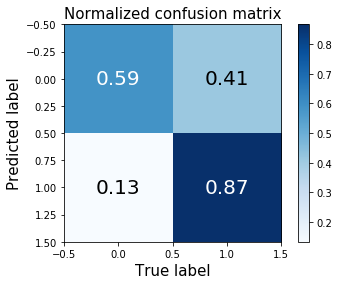

In [56]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

predicted_labels = model.predict(X_test)
cm = confusion_matrix(Y_test, [np.round(i[0]) for i in predicted_labels])
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]



plt.imshow(cm, cmap = plt.cm.Blues)
plt.title('Normalized confusion matrix', fontsize = 15)
plt.colorbar()
plt.xlabel('True label', fontsize = 15)
plt.ylabel('Predicted label', fontsize = 15)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment = 'center', verticalalignment = 'center', fontsize = 20,
             color='white' if cm[i, j] > 0.5 else 'black')
plt.show()